In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import statsmodels.api as sm
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv(r"C:\Users\navsi\OneDrive\Desktop\crop_production.csv")

In [5]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [12]:
# Check for null values
print("Null values before handling:")
print(data.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows before removal:", data.duplicated().sum())

# Remove duplicate rows
data = data.drop_duplicates()

# Fill null values with the mean or other appropriate strategy
# For example, filling null values in 'Production' with the mean
data['Production'].fillna(data['Production'].mean(), inplace=True)

# Alternatively, you can drop rows with null values
# df.dropna(inplace=True)

# Check for null values after handling
print("\nNull values after handling:")
print(data.isnull().sum())

# Check for duplicate rows after removal
print("\nNumber of duplicate rows after removal:", data.duplicated().sum())



Null values before handling:
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

Number of duplicate rows before removal: 0

Null values after handling:
State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

Number of duplicate rows after removal: 0


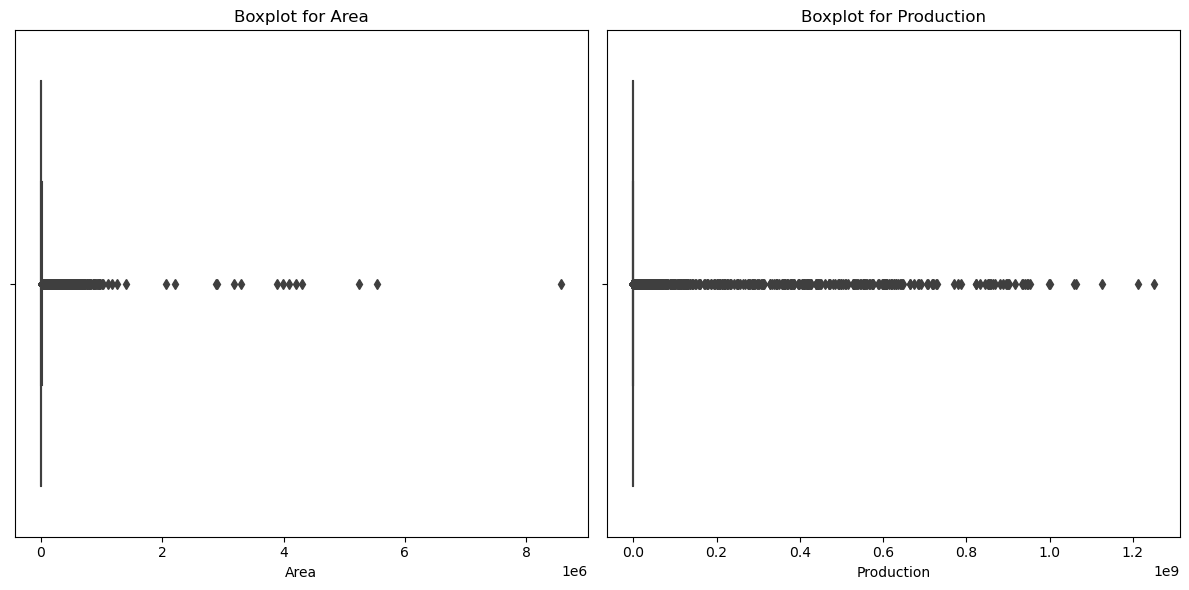

In [13]:
# Select numerical columns for outlier detection
numerical_columns = ['Area', 'Production']

# Create box plots to visualize outliers
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [15]:
from scipy import stats

# Calculate the Z-scores for 'Area' and 'Production'
z_scores = stats.zscore(data[['Area', 'Production']])

# Define a threshold for considering values as outliers (e.g., Z-score > 3 or Z-score < -3)
threshold = 3

# Identify outliers based on the Z-scores
outliers = ((z_scores > threshold) | (z_scores < -threshold)).any(axis=1)

# Print the indices of rows with outliers
print("Indices of rows with outliers:")
print(data[outliers].index)


Indices of rows with outliers:
Int64Index([     5,     14,     23,     32,     41,     50,     57,     77,
               208,    236,
            ...
            245728, 245765, 245801, 245843, 245885, 245921, 245985, 246017,
            246052, 246089],
           dtype='int64', length=3883)


In [16]:
# Assuming 'outliers' is the boolean mask created in the previous code

# Remove rows with outliers
data_no_outliers = data[~outliers]

# Display the shape of the DataFrame before and after removing outliers
print("Shape of the original DataFrame:", data.shape)
print("Shape of the DataFrame after removing outliers:", data_no_outliers.shape)


Shape of the original DataFrame: (246091, 7)
Shape of the DataFrame after removing outliers: (242208, 7)


In [21]:

# Assuming 'df_no_outliers_encoded' is your DataFrame with no outliers and 'Yield' as the target variable

# Define features (X) and target variable (y)
X = data_no_outliers.drop(['Production'], axis=1)
y = data_no_outliers['Production']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional, but can be beneficial for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 1.4352174505440955e+31
R-squared: -2.3755322279368974e+19


In [28]:
# Define features (X) and target variable (y)
X = data_no_outliers.drop(['Production'], axis=1)
y = data_no_outliers['Production']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional, but can be beneficial for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Regression model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model
random_forest_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 103999408049.43208
R-squared: 0.8278630562817314
